# Variable template size in mps_snesim_tree and mps_snesim_list

mps_snesim_tree and mps_snesim_list allowing using a template size that changes for each multiple grid. The template size is given as a value for the coarsest multiple grid, and a value for the final dense simulation grid. Linear interpolation is used to compute the template size at each multiple grid

For example using a template size of 8x7x4 oon the coarsest grid and a template size of 4x3x3 on the finest grid can be given in the mps_snesim parameter file as

    Search template size X # 8 4
    Search template size Y # 7 3
    Search template size Z # 4 3
    
This template can be set in Python using 

    O=mps.mpslib(method='mps_snesim_tree')
    O.par['template_size']=np.array([[8,7,4],[4,3,3]]).T

A simple constant template of size [8,7,3] can be set using

    O.par['template_size']=np.array([8,7,4])


The main reason for using variable template size is that, typically, a considerable amount of CPU is used in the finer simulation grids to prune (remove) conditional data. 

The example below demonstrates the CPU time compared to using a varying template size at the finest grid.

See more at https://mpslib.readthedocs.io/en/latest/Examples/ex_varying_template.html

In [1]:
import mpslib as mps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
#TI1, TI_filename1 = mps.trainingimages.strebelle(2, coarse3d=1)
TI1, TI_filename1 = mps.trainingimages.strebelle(1, coarse3d=1)

O1=mps.mpslib(method='mps_snesim_tree')
O1.ti=TI1
O1.par['n_multiple_grids']=4;
O1.par['n_cond']=81
O1.par['n_real']=1
O1.par['rseed']=1
O1.par['debug_level']=-1
O1.par['simulation_grid_size'][0]=135
O1.par['simulation_grid_size'][1]=100
O1.par['simulation_grid_size'][2]=1

In [3]:

r1 = 11 # template size in the coarse grid
r2 = [11,10,9,8,7,6,5,4,3,2,1] # template size in the finest grid

t=[]
R=[]
for ir in range(len(r2)):
    
    O1.delete_local_files()
    
    template = np.array([[r1, r2[ir]], [r1, r2[ir]], [1, 1]])
    O1.par['template_size']=template
    name = '%s_%d_%d'%(O1.method,r1,r2[ir])
    print(name)
    O1.parameter_filename= name+'.par'
    O1.mps_snesim_par_write()
    O1.run()
    R.append(O1.sim[0])

    t.append(O1.time)   


mps_snesim_tree_11_11
mps_snesim_tree_11_10
mps_snesim_tree_11_9
mps_snesim_tree_11_8
mps_snesim_tree_11_7
mps_snesim_tree_11_6
mps_snesim_tree_11_5
mps_snesim_tree_11_4
mps_snesim_tree_11_3
mps_snesim_tree_11_2
mps_snesim_tree_11_1


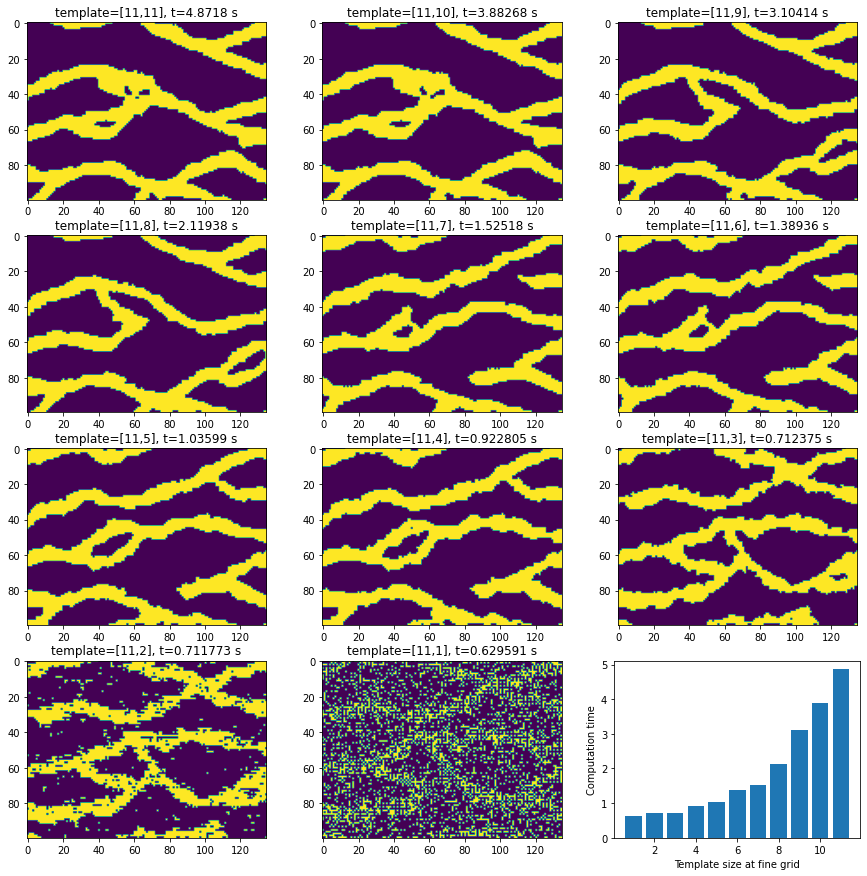

In [4]:
#%% Plot the realizations and a bar of the timing
fig = plt.figure(figsize=(15, 15))
outer = gridspec.GridSpec(4, 3, wspace=0.2, hspace=0.2)

for ir in range(len(r2)):
    ax1 = plt.Subplot(fig, outer[ir])
    fig.add_subplot(ax1)
    plt.imshow(np.transpose(np.squeeze(R[ir])))
    plt.title('template=[%d,%d], t=%g s'%(r1,r2[ir],t[ir]))

ax1 = plt.Subplot(fig, outer[-1])
fig.add_subplot(ax1)
plt.bar(r2,t)
plt.xlabel('Template size at fine grid')
plt.ylabel('Computation time')
plt.savefig('varying_template', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', transparent=True)

plt.show()

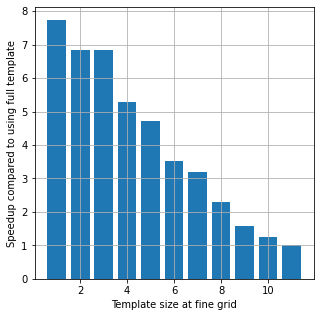

In [5]:
#%% SPPEEDUP
fig = plt.figure(figsize=(5, 5))
plt.bar(r2,t[0]/np.array(t))
plt.xlabel('Template size at fine grid')
plt.ylabel('Speedup compared to using full template')
plt.grid()  
plt.savefig('varying_template_speedup', dpi=600, facecolor='w', edgecolor='w', orientation='portrait', transparent=True)

plt.show()